<a href="https://colab.research.google.com/github/opanasyuzhenkova/university-portfolio/blob/main/6sem_lr4_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 4

In [ ]:
import pandas as pd

data = pd.read_csv('web_traffic.tsv', delimiter='\t', names=['hours', 'n_requests'])
print(data)

     hours  n_requests
0        1      2272.0
1        2         NaN
2        3      1386.0
3        4      1365.0
4        5      1488.0
..     ...         ...
738    739      4970.0
739    740      4813.0
740    741      5392.0
741    742      5906.0
742    743      4881.0

[743 rows x 2 columns]


In [ ]:
import numpy as np
from numpy import isnan

# TODO: Использовать функцию notna()

hours_data = data['hours'][data['n_requests'].notna()]
requests_data = data['n_requests'][data['n_requests'].notna()]

print(hours_data, requests_data)

0        1
2        3
3        4
4        5
5        6
      ... 
738    739
739    740
740    741
741    742
742    743
Name: hours, Length: 735, dtype: int64 0      2272.0
2      1386.0
3      1365.0
4      1488.0
5      1337.0
        ...  
738    4970.0
739    4813.0
740    5392.0
741    5906.0
742    4881.0
Name: n_requests, Length: 735, dtype: float64


In [ ]:
# %matplotlib inline

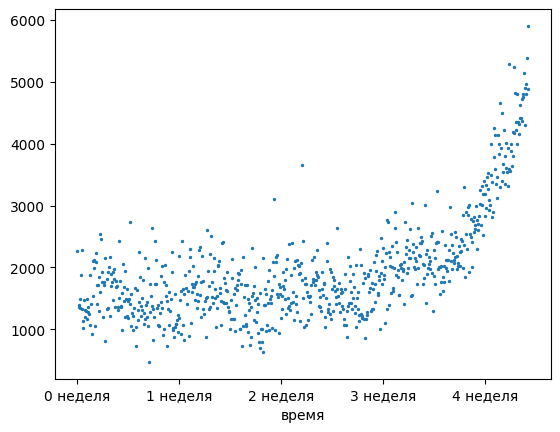

In [ ]:
# Визуализация

import matplotlib.pyplot as plt

plt.scatter(hours_data, requests_data, s=2)
plt.xlabel('время')

plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])

plt.autoscale(tight=False)

plt.show()

In [ ]:
f1p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 1, full=True)
f2p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 2, full=True)
f3p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 3, full=True)
f5p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 5, full=True)
f10p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 10, full=True)
f20p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 20, full=True)

print("Параметры модели {}".format(f1p))
print("Параметры модели {}".format(f2p))
print("Параметры модели {}".format(f3p))

Параметры модели [  2.59619213 989.02487106]
Параметры модели [ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]
Параметры модели [ 3.04960132e-05 -2.35893797e-02  4.94226019e+00  1.33328797e+03]


Таким образом, наша модель будет выглядеть следующим образом:
```
f(x) = 2.59619213 * x + 989.02487106
```

Посчитаем ошибку нашей модели:

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

f1x = np.poly1d(f1p)
r_array = []
r_array.append(r2_score(requests_data,  f1x(hours_data)))


fx2 = np.poly1d(f2p)
r_array.append(r2_score(requests_data,  fx2(hours_data)))

fx3 = np.poly1d(f3p)
r_array.append(r2_score(requests_data,  fx3(hours_data)))

fx5 = np.poly1d(f5p)
r_array.append(r2_score(requests_data,  fx5(hours_data)))

fx10 = np.poly1d(f10p)
r_array.append(r2_score(requests_data,  fx5(hours_data)))

fx20 = np.poly1d(f20p)
r_array.append(r2_score(requests_data,  fx20(hours_data)))


mae1 = mean_absolute_error(requests_data, f1x(hours_data))
rmse1 = mean_squared_error(requests_data, f1x(hours_data), squared=False)
mse1 = mean_squared_error(requests_data,  f1x(hours_data), squared=True)

mae2 = mean_absolute_error(requests_data, fx2(hours_data))
rmse2 = mean_squared_error(requests_data, fx2(hours_data), squared=False)
mse2 = mean_squared_error(requests_data,  fx2(hours_data), squared=True)

mae3 = mean_absolute_error(requests_data, fx3(hours_data))
rmse3 = mean_squared_error(requests_data, fx3(hours_data), squared=False)
mse3 = mean_squared_error(requests_data,  fx3(hours_data), squared=True)

mae5 = mean_absolute_error(requests_data, fx5(hours_data))
rmse5 = mean_squared_error(requests_data, fx5(hours_data), squared=False)
mse5 = mean_squared_error(requests_data,  fx5(hours_data), squared=True)

mae10 = mean_absolute_error(requests_data, fx10(hours_data))
rmse10 = mean_squared_error(requests_data, fx10(hours_data), squared=False)
mse10 = mean_squared_error(requests_data,  fx10(hours_data), squared=True)

mae20 = mean_absolute_error(requests_data, fx20(hours_data))
rmse20 = mean_squared_error(requests_data, fx20(hours_data), squared=False)
mse20 = mean_squared_error(requests_data,  fx20(hours_data), squared=True)

print(r_array)
print(mae1, mse1, rmse1)
print(mae2, mse2, rmse2)
print(mae3, mse3, rmse3)
print(mae5, mse5, rmse5)
print(mae10, mse10, rmse10)
print(mae20, mse20, rmse20)


[0.41632369094258914, 0.6690122985058977, 0.7437366099834488, 0.7711107518847922, 0.7711107518847922, 0.7967407157687268]
504.88101037565264 431822.81270718103 657.1322642415156
389.26631899805625 244875.52092269278 494.84898799804853
344.1036970490545 189592.0326962248 435.4216722858714
325.1390989686416 169339.74770906617 411.50911011673384
319.04082734267826 165907.92702530022 407.31796796274557
300.7347745484516 150377.86263304277 387.78584635471515


In [ ]:
import numpy as np
import math

mse1 = np.square(np.subtract(requests_data, f1x(hours_data))).mean()
rmse1 = math.sqrt(mse1)

print(mse1, rmse1)



431822.81270718103 657.1322642415156


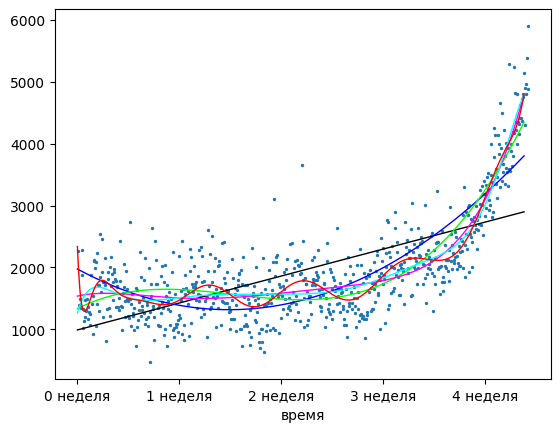

In [ ]:
# Визуализация

import matplotlib.pyplot as plt

plt.scatter(hours_data, requests_data, s=2)
plt.xlabel('время')

plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])

fx = np.linspace(0, hours_data[len(hours_data)], len(hours_data))

fy = f1x(fx)
f2y = fx2(fx)
f3y = fx3(fx)
f5y = fx5(fx)
f10y = fx10(fx)
f20y = fx20(fx)


plt.plot(fx, fy, linewidth=1.0, color='black')
plt.plot(fx, f2y, linewidth=1.0, color='blue')
plt.plot(fx, f3y, linewidth=1.0, color='lime')
plt.plot(fx, f5y, linewidth=1.0, color='magenta')
plt.plot(fx, f10y, linewidth=1.0, color='cyan')
plt.plot(fx, f20y, linewidth=1.0, color='red')


plt.autoscale(tight=False)

plt.show()

# Лабораторная работа 5

# Новый раздел

In [ ]:
train_border = 3.5
final_border = 4.2

train_data  = int(train_border * 7 * 24) # 588
final_border = int(final_border * 7 * 24)

# print(divider)
# train set
hours_data_1, requests_data_1 = hours_data_1[train_data:final_border], requests_data[train_data:final_border]
# test set
hours_data_2, requests_data_2 = hours_data[final_border:], requests_data[final_border:]
print(requests_data_1.shape)
print(requests_data_2.shape)

# print(588+84)

NameError: ignored

In [ ]:
f2p_1, residuals_1, rank_1, sv_1, rcond_1 = np.polyfit(hours_data_1, requests_data_1, 3, full=True)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
fx_1 = np.poly1d(f2p_1)
r2_array_1 = []  # здесь будут храниться значения точности
r2_array_1.append(r2_score(requests_data_2, fx_1(hours_data_2)))
rmse = mean_squared_error(requests_data_2,fx_1(hours_data_2), squared=False)
mse = mean_squared_error(requests_data_2,fx_1(hours_data_2), squared=True)
print(r2_array_1, mse, rmse)

При степени полинома 3, ```r_2 = 0.174``` при разбивке данных без учета очевидного тренда (начиная с 3.5 недели).

При степени полинома 3, ```r_2 = 0.757``` при разбивке данных c учетом очевидного тренда (начиная с 3.5 недели).

In [ ]:
# Визуализация

import matplotlib.pyplot as plt

plt.scatter(hours_data, requests_data, s=2)
plt.xlabel('время')

plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])

# отобразим модель #1
f2x = np.linspace(0, hours_data[len(hours_data)], len(hours_data))
f2y = fx(f2x)
plt.plot(f2x, f2y, linewidth=1.0, color='red')

plt.autoscale(tight=False)

plt.show()

# Ответить развернуто и пояснить ответ на вопрос ниже:

```Какая модель для гипотезы, при которой весь набор данных представляет собой два диапазона значений (например, от 0 недели до 3.5 недели и с 3.5 недели до конца или какой-то другой диапазон/граница), подходит наилучшим образом (дает наименьшую ошибку)?```

Аргументировать ответ метриками ошибок (MSE, RMSE, MAE).

Модель, в данном случае, это степень полинома.

Изменится ли ответ, если предположить, что степень полинома 20 плохо подходит для тестовых данных потому что ошибка получаемая для тестовых данных на много порядков больше, чем ошибка для тренировочного набора данных.

Если мы разделим данные на два диапазона:

In [ ]:
divider = int(3.5*7*24)
divider2 = int(4.1*7*24)

hours_data_1, requests_data_1 = hours_data[:divider], requests_data[:divider]
hours_data_2, requests_data_2 = hours_data[divider:divider2], requests_data[divider:divider2]

hours_data_test, requests_data_test = hours_data[divider2:], requests_data[divider2:]

print(requests_data_1.shape, requests_data_2.shape, requests_data_test.shape)

и обучим модель 20 степени полинома на данных, тренд которых мы предположим наиболее оптимальным для будущих данных (с 3.5 до 4.1 недели):

In [ ]:
f20p, residuals, rank, sv, rcond = np.polyfit(hours_data_2, requests_data_2, 20, full=True)
f20 = np.poly1d(f20p)
rmse_1 = mean_squared_error(requests_data_2,f20(hours_data_2), squared=False)
rmse_2 = mean_squared_error(requests_data_test,f20(hours_data_test), squared=False)
print(f"RMSE (для данных c 3.5 недели по 4.1 недели)= {rmse:.5}")
print(f"RMSE (только для данных с 3.5 недели)= {rmse_2:.5}")

Посчитав ошибку RMSE с использованием обученной модели степени полинома 20 на данных начиная с 3.5 недели, мы получим огромную ошибку на много порядков превышающую ошибку на тренировочной выборке.

```Какая степень полинома дает там ошибку меньшую или примерно равную ошибке на тренировочном датасете?```. Поясните свой ответ на основе данных.